![Astrofisica Computacional](../logo.PNG)

---
## 29. Interpolación de Funciones


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

## Interpolation 01

### About this notebook

In this notebook we present some of the interpolation techniques.

---

## Interpolation

Experimental astrophysical data usually consist of a discrete set of data points $(x_j, f_j)$ which represent the value of a function $f(x)$ for a finite set of arguments $\{ x_1, x_2, ..., x_n \}$. However, it is usually needed to know the value of the function at aditional points and **interpolation** is the method used to obtain those values.

**Interpolation** corresponds to define a function $g(x)$, using the known discrete information and such that $g(x_j) = f(x_j)$, to approximate the value of $f$ at any point $x \in [x_{min}, x_{max}]$, where $x_{min} = \min [x_j]$ and $x_{max} = \max \{ x_j \}$. 

**Extrapolation** will correspond to approximate the value of $f$ at a point $x \notin [x_{min}, x_{max}]$}. 
 
--- 
## Simple Polynomial Interpolation

The simplest method of interpolation is called **Polynomial Interpolation** and consist in finding a polynomial $p(x)$ of degree $n$ that passes through $n+1$ points $x_j$ with values $p(x_j) = f(x_j)$, where $j=0,1,2,...,n$. 

The polynomial is written

$p_n(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$

where $a_i$ are $n+1$-real constants to be determined by the conditions 

$\left( 
\begin{array}{ccccc}
1&x_0^1&x_0^2&\cdots&x_0^n\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
1&x_n^1&x_n^2&\cdots&x_n^n\\
\end{array}
\right)
\left(\begin{array}{c}
a_0\\
\vdots\\
\vdots\\
a_n
\end{array}\right)
=
\left(\begin{array}{c}
f(x_0)\\
\vdots\\
\vdots\\
f(x_n)
\end{array}\right)$

Solving this system is straightforward for simple cases such as linear ($n=1$) and quadratic ($n=2$) interpolation,which we show below, but can be complicated for large $n$. 

---
### Linear Interpolation

The linear interpolation ($n=1$) of a function $f(x)$ in an interval
$[x_i,x_{i+1}]$ requires information from just two points (the lower and upper limits of the interval). 

Solving the linear system or equivalently, using the forward difference approximation defined for numerical derivation, we obtain the linear polynomial 

$p_1(x) = f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{h} (x-x_i) + \mathcal{O}(h^2)$,

where $h=x_{i+1} - x_i$.

The linear interpolation method provides a polynomial with second order accuracy and that can be differentiated once, but this derivative is not continuous at the endpoints $x_i$ and $x_{i+1}$.

#### Example. Piecewise Linear Interpolation

We will read a data set from a .txt file and interpolate linearly between each pair of points (piecewise interpolation)

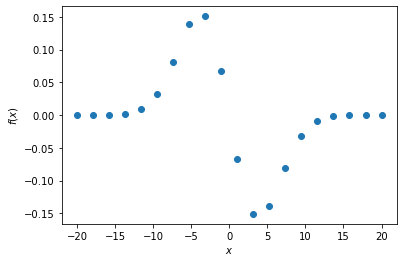

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

plt.figure()
plt.scatter(x,f)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

In [2]:
data.shape

(20, 2)

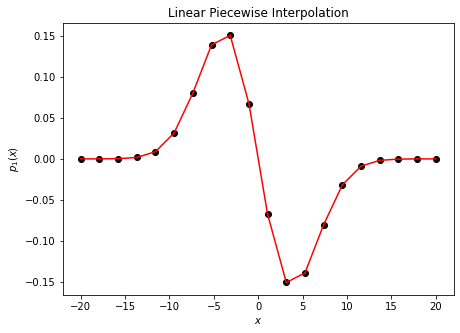

In [3]:
def linearInterpolation(x1, x2, f1, f2, x):
    p1 = f1 + ((f2-f1)/(x2-x1))*(x-x1)
    return p1
    
N = len(x)

plt.figure(figsize=(7,5))
plt.scatter(x, f, color='black')

for i in range(N-1):
    x_interval = np.linspace(x[i],x[i+1],3) 
    # Note that the number 3 in thie above line indeicates the number of 
    # points interpolated in each interval !
    # (including the extreme points of the interval)
    y_interval = linearInterpolation(x[i], x[i+1], f[i], f[i+1], x_interval)
    plt.plot(x_interval, y_interval,'r')
    
plt.title(r'Linear Piecewise Interpolation')
plt.xlabel(r'$x$')
plt.ylabel(r'$p_1(x)$')
plt.show()

---
### Quadratic Interpolation

The quadratic interpolation ($n=2$) requires information of three points and the resulting polynomial will be sensitive to which three points are chosen. 

Choosing the points $x_i$ , $x_{i+1}$ and $x_{i+2}$ for interpolating $f(x)$ in the range $[x_{i},x_{i+1}]$ and solving the corresponding system from the linear system gives

$p_2(x) = \frac{(x-x_{i+1})(x-x_{i+2})}{(x_i - x_{i+1})(x_i - x_{i+2})} f(x_i)
+ \frac{(x-x_{i})(x-x_{i+2})}{(x_{i+1} - x_{i})(x_{i+1} - x_{i+2})} f(x_{i+1}) 
+ \frac{(x-x_i)(x-x_{i+1})}{(x_{i+2} - x_i)(x_{i+2} - x_{i+1})} f(x_{i+2}) + \mathcal{O}(h^3)$,

where $h = \max \{ x_{i+2}-x_{i+1},x_{i+1}-x_i \}$. 

This time the interpolating polynomial $p(x)$ is twice differentiable, but although its first derivative will be continuous, the second derivative will have finite-size steps.

#### Example. Piecewise Quadratic Interpolation

We will read a data set from a .txt file and interpolate a second order polynomial between each pair of points (piecewise interpolation)

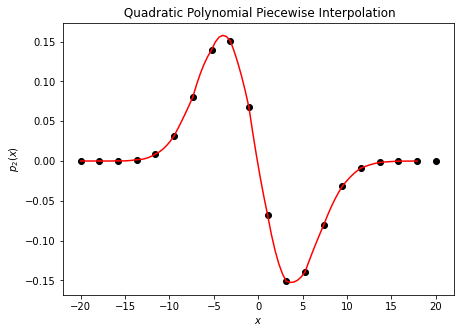

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 +\
    (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
    (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2
    
N = len(x)

plt.figure(figsize=(7,5))
plt.scatter(x, f, color='black')

for i in range(N-2):
    x_interval = np.linspace(x[i],x[i+1],6) # 6 interpolate points in each interval
    y_interval = quadraticInterpolation(x[i], x[i+1], x[i+2], f[i], f[i+1], f[i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')

plt.title(r' Quadratic Polynomial Piecewise Interpolation')
plt.xlabel(r'$x$')
plt.ylabel(r'$p_2(x)$')
plt.show()

**Note:** Tthe form of this quadratic interpolation leaves the last interval without information (because we need three points to apply the numerical method).

---
## Lagrange Interpolation

**Lagrange Interpolation** also finds an interpolating polynomial of degree $n$ using data at $n+1$
points, but uses an alternative method for finding the coefficients. First, we re-write the interpolating linear polynomial as

\begin{equation} 
p_1(x) = \frac{x-x_{i+1}}{x_i - x_{i+1}} f(x_i) + \frac{x-x_i}{x_{i+1}-x_i} f(x_{i+1}) + \mathcal{O}(h^2),
\end{equation} 
or as
\begin{equation} 
p_1(x) = \sum_{j=i}^{i+1} f(x_j) L_{1j}(x) + \mathcal{O}(h^2) 
\end{equation}

where we introduce the Lagrange coefficients
\begin{equation} 
L_{1j}(x) = \frac{x-x_k}{x_j-x_k}\bigg|_{k\ne j}
\end{equation} 

Note that these coefficients ensure that the polynomial passes through the two data points, i.e. $p_1(x_i) = f(x_i)$ and $p_1(x_{i+1}) = f(x_{i+1})$

**Lagrange interpolation** generalizes these expressions to give a polynomial of degree $n$ that
passes through all the $n+1$ data points. It is defined by
\begin{equation}
p_n (x) = \sum_{j=0}^{n} f(x_j) L_{nj}(x) + \mathcal{O}(h^{n+1})\,, \label{eq:LagrangeInterpolation}
\end{equation}
where the coefficients are generalized to
\begin{equation}
L_{nj}(x) = \prod_{k\ne j}^{n} \frac{x-x_k}{x_j - x_k}\,.
\end{equation}

Again, it is important to note that these coefficients ensure that $p(x_j) = f(x_j)$ for the $n+1$ data points.

In [5]:
# %load lagrangeInterpolation
'''
Eduard Larrañaga
Computational Astrophysics 
2020

Lagrange Interpolation Method
'''

import numpy as np

#Lagrange Coefficients
def L(x, xi, j):
	'''
	------------------------------------------
	L(x, xi, j)
	------------------------------------------
    Returns the Lagrange coefficient for the 
    interpolation evaluated at points x
    Receives as arguments:
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of N data points 
    j : index of the coefficient to be 
    calculated
	------------------------------------------
	'''
	# Number of points
	N = len(xi) 

	prod = 1
	for k in range(N):
		if (k != j):
			prod = prod * (x - xi[k])/(xi[j] - xi[k])
	return prod





# Interpolated Polynomial
def p(x, xi, fi):
	'''
	------------------------------------------
    p(x, xi, fi)
    ------------------------------------------
    Returns the values of the Lagrange 
    interpolated polynomial in a set of points
    defined by x
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of N data points points
    fi : values of the function to be 
    interpolated
    ------------------------------------------
	'''
	# Number of points
	N = len(xi)

	summ = 0
	for j in range(N):
		summ = summ + fi[j]*L(x, xi, j)
	return summ


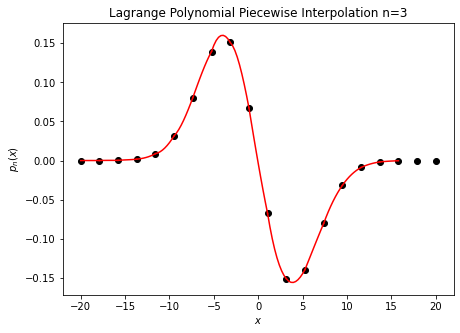

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Degree of the polynomial to be interpolated piecewise
n = 3

# Check if the number of point is enough to interpolate such a polynomial
if n>=N:
    print('\nThere are not enough points to interpolate this polynomial.')
    print(f'Using {N:.0f} points it is possible to interpolate polynomials up to order n={N-1:.0f}')
    sys.exit()

    
plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

# Piecewise Interpolation Loop
for i in range(N-n):
    xi = x[i:i+n+1]
    fi = f[i:i+n+1]
    x_interval = np.linspace(x[i],x[i+1],3*n)
    y_interval = p(x_interval,xi,fi)
    plt.plot(x_interval, y_interval,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

Note that the las $N-n$ points can be interpolated. What can we do?

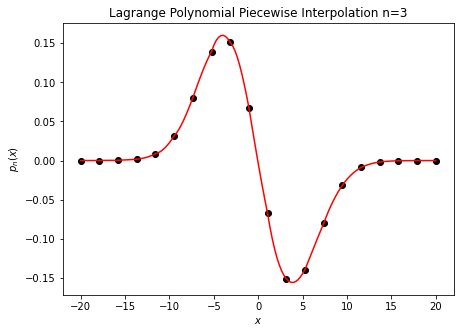

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Degree of the polynomial to be interpolated piecewise
n = 3

# Check if the number of point is enough to interpolate such a polynomial
if n>=N:
    print('\nThere are not enough points to interpolate this polynomial.')
    print(f'Using {N:.0f} points it is possible to interpolate polynomials up to order n={N-1:.0f}')
    sys.exit()

    
plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

# Piecewise Interpolation Loop
for i in range(N-n):
    xi = x[i:i+n+1]
    fi = f[i:i+n+1]
    x_interval = np.linspace(x[i],x[i+1],3*n)
    y_interval = p(x_interval,xi,fi)
    plt.plot(x_interval, y_interval,'r')

# Piecewise Interpolation for the final N-n points, 
# using a lower degree polynomial
while n>1:
    m = n-1
    for i in range(N-n,N-m):
        xi = x[i:i+m+1]
        fi = f[i:i+m+1]
        x_interval = np.linspace(x[i],x[i+1],3*m)
        y_interval = p(x_interval,xi,fi)
        plt.plot(x_interval, y_interval,'r')
    n=n-1


plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

### Runge's Phenomenon

Why to interpolate piecewise? It is ususal to hink that interpolating a high order polynomial may be better than lower order polynomials. However, for oscillating function this is ususally not a good idea due to Runge's phenomenon.

For example, for a dataset with $N$-points we can interpolate a $19$-degree polynomial:

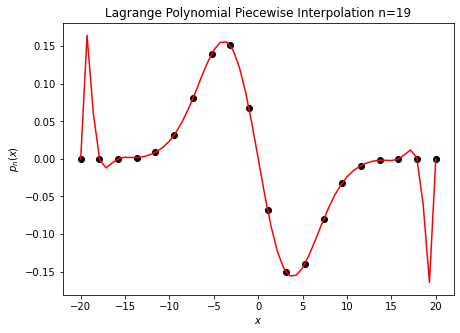

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Higher Degree polynomial to be interpolated 
n = N-1

plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

#Interpolation of the higher degree polynomial
x_int = np.linspace(x[0],x[N-1],3*n)
y_int = lagi.p(x_int,x,f)
plt.plot(x_int, y_int,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

It is clear that the high order polynomial interpolated (not piecewise), has a bad behavior, specially at the borders of the dataset interval. The bad behavior is worst for higly oscillating functions!

---
## Piecewise Cubic Hermite Interpolation

Hermite interpolation is a special form of polynomial interpolation which uses data points and the derivatives of the data to obtain the interpolating polynomial. Incorporation of the first derivative reduces the unwanted oscillations. The inclusion of the derivative also permits to interpolate a high-order polynomial with less data points than Lagrange interpolation.

Piecewise third-order Hermite interpolation is one of the most used cases. In this method, for each domain interval $[x_i , x_{i+1}]$, in which we know (or evaluate) $f(x_i)$, $f(x_{i+1})$, $f'(x_i)$ and $f'(x_{i+1})$, one interpolates a cubic Hermite polynomial given by

\begin{equation}
H_3(x) = f(x_i)\psi_0(z) + f(x_{i+1})\psi_0(1-z)+ f'(x_i)(x_{i+1} - x_{i})\psi_1(z) - f'(x_{i+1})(x_{i+1}-x_i)\psi_1 (1-z),
\end{equation}

where 

\begin{equation}
z = \frac{x-x_i}{x_{i+1}-x_i}
\end{equation}
and
\begin{align}
\psi_0(z) =&2z^3 - 3z^2 + 1 \\
\psi_1(z) =&z^3-2z^2+z\,\,.
\end{align}

Note that it is possible to interpolate a third-order polynomial in an interval with only two points! This fact makes possible to interpolate the third-order polynomial between all intervals, even the last one.

In [ ]:
# %load HermiteInterpolation
'''
Eduard Larrañaga
Computational Astrophysics 
2020

Hermite Interpolation Method
'''

import numpy as np

#Hermite Coefficients
def psi0(z):
	'''
	------------------------------------------
	psi0(z)
	------------------------------------------
	Returns the Hermite coefficients Psi_0
	for the interpolation
	Receives as arguments: z
	------------------------------------------
	'''
	psi_0 = 2*z**3 - 3*z**2 + 1
	return psi_0

def psi1(z):
	'''
	------------------------------------------
	psi1(z)
	------------------------------------------
	Returns the Hermite coefficients Psi_1 for 
	the interpolation
	Receives as arguments: z
	------------------------------------------
	'''
	psi_1 = z**3 - 2*z**2 + z
	return psi_1


# Interpolated Polynomial
def H3(x, xi, fi, dfidx):
	'''
	------------------------------------------
    H3(x, xi, fi, dfidx)
    ------------------------------------------
    Returns the values of the Cubic Hermite 
    interpolated polynomial in a set of points
    defined by x
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of 2 data points 
    fi : array of values of the function at xi
    dfidx : array of values of the derivative 
    of the function at xi
    ------------------------------------------
	'''
	# variable z in the interpolation
	z = (x - xi[0])/(xi[1] - x[0])
	
	h1 = psi0(z) * fi[0]
	h2 = psi0(1-z)*fi[1]
	h3 = psi1(z)*(xi[1] - xi[0])*dfidx[0]
	h4 = psi1(1-z)*(xi[1] - xi[0])*dfidx[1]
	H =  h1 + h2 + h3 - h4
	return H


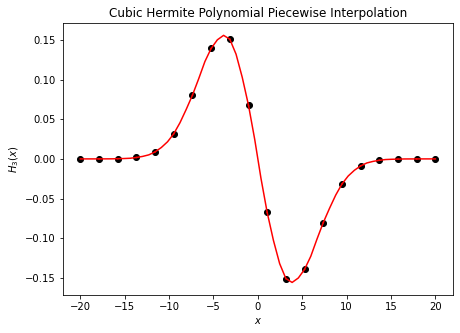

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import HermiteInterpolation as heri

def Derivative(x, f):
    '''
    ------------------------------------------
    Derivative(x, f)
    ------------------------------------------
    This function returns the numerical 
    derivative of a discretely-sample function 
    using one-side derivatives in the extreme 
    points of the interval and second order 
    accurate derivative in the middle points.
    The data points may be evenly or unevenly
    spaced.
    ------------------------------------------
    '''
    # Number of points
    N = len(x)
    dfdx = np.zeros([N, 2])
    dfdx[:,0] = x
    
    # Derivative at the extreme points
    dfdx[0,1] = (f[1] - f[0])/(x[1] - x[0])
    dfdx[N-1,1] = (f[N-1] - f[N-2])/(x[N-1] - x[N-2])
    
    #Derivative at the middle points
    for i in range(1,N-1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        dfdx[i,1] = h1*f[i+1]/(h2*(h1+h2)) - (h1-h2)*f[i]/(h1*h2) -\
                    h2*f[i-1]/(h1*(h1+h2))
    
    return dfdx

# Loading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
N = len(x)

# Calling the derivative function and chosing only the second column
dfdx = Derivative(x,f)[:,1]

plt.figure(figsize=(7,5))
plt.title(f'Cubic Hermite Polynomial Piecewise Interpolation')
plt.scatter(x, f, color='black')

# Piecewise Hermite Interpolation Loop
for i in range(N-1):
    xi = x[i:i+2]
    fi = f[i:i+2]
    dfidx = dfdx[i:i+2]
    x_interval = np.linspace(x[i],x[i+1],4)
    y_interval = heri.H3(x_interval, xi, fi, dfidx)
    plt.plot(x_interval, y_interval,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$H_3(x)$')
plt.show()
